# <center>`XGBoost Classifier`</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost
print('XGBoost version:', xgboost.__version__)
from sklearn import metrics

XGBoost version: 2.1.1


# 2. Load `banknote_authentication` dataset

In [2]:
df = pd.read_csv('banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.shape

(1372, 5)

In [4]:
df['class'].unique()

array([0, 1])

In [5]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

# 3. Separate features and classes

In [6]:
X = df.iloc[:, :-1]
y = df.loc[:, 'class']

# 4. Split the dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=1)

In [8]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1029, 343, 1029, 343)

# 5. Apply `XGBoost Classifier`

In [9]:
xgb = xgboost.XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.5, random_state=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [10]:
print('Accuracy on the train set:', round(xgb.score(X_train, y_train), 4))
print('Accuracy on the test set:', round(xgb.score(X_test, y_test), 4))

Accuracy on the train set: 1.0
Accuracy on the test set: 0.9942


# 6. Plot `confusion_matrix`

In [11]:
y_pred = xgb.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=xgb.classes_)

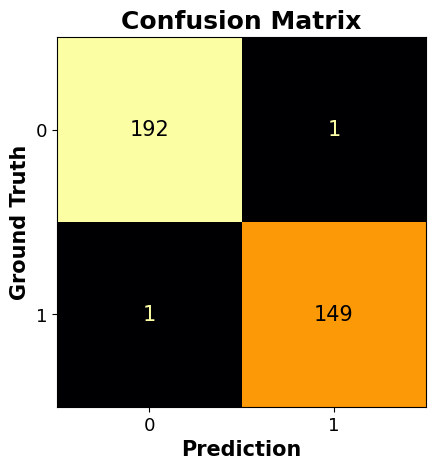

In [12]:
disp.plot(cmap='inferno', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [13]:
y_test.value_counts()

0    193
1    150
Name: class, dtype: int64

In [14]:
print('F1 score:', round(metrics.f1_score(y_test, y_pred), 4))
print('Jaccard score:', round(metrics.jaccard_score(y_test, y_pred), 4))

F1 score: 0.9933
Jaccard score: 0.9868


# 8. Print `classification_report`

In [15]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       193
           1       0.99      0.99      0.99       150

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



# 9. Feature importance

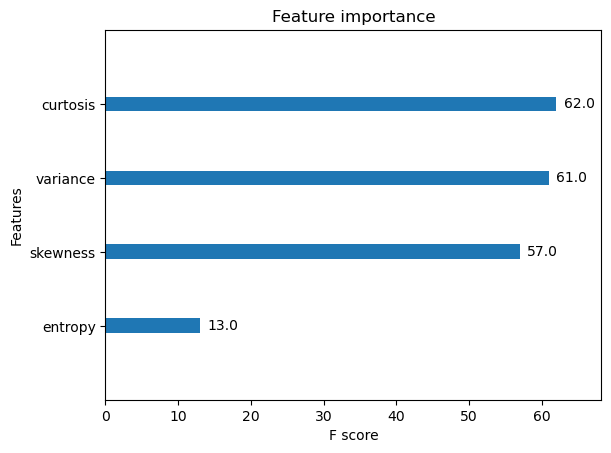

In [16]:
xgboost.plot_importance(xgb, grid=False);